## Data Analysis

In [9]:
import pandas as pd

people = ['gdhande', 'Munesh', 'nivedita', 'Shweta', 'Swapnanil', 'Sharath']
dfs = []

for i,person in enumerate(people):
    df = pd.read_csv(f'data/s{i+1}.csv')
    df = df.rename(columns={'tweet': 'feature', f'annotations.{person}.supernarrative_1' : 'label'})
    df['label'] = df['label'].fillna('None')
    #df['label'] = pd.factorize(df['label'])[0]
    #df = df[['feature', 'label']]
    dfs.append(df)

df = pd.concat(dfs,ignore_index=False)

In [3]:
# Load the dataset
#data = pd.read_csv("C:/Users/r1025/Desktop/Group/annotated_tweets_cleaned.csv")

# Print column names and data types
print("Column Names:", df.columns.tolist())
print("Data Types:\n", df.dtypes)

# Display summary statistics for numerical columns
print("Summary Statistics:\n", df.describe())

# Optionally, visualize data
import matplotlib.pyplot as plt
import seaborn as sns

Column Names: ['feature', 'label']
Data Types:
 feature    object
label      object
dtype: object
Summary Statistics:
                                                   feature label
count                                                1200  1200
unique                                               1182    11
top     @mention know Tory cuts devastated schools @me...  None
freq                                                    3   546


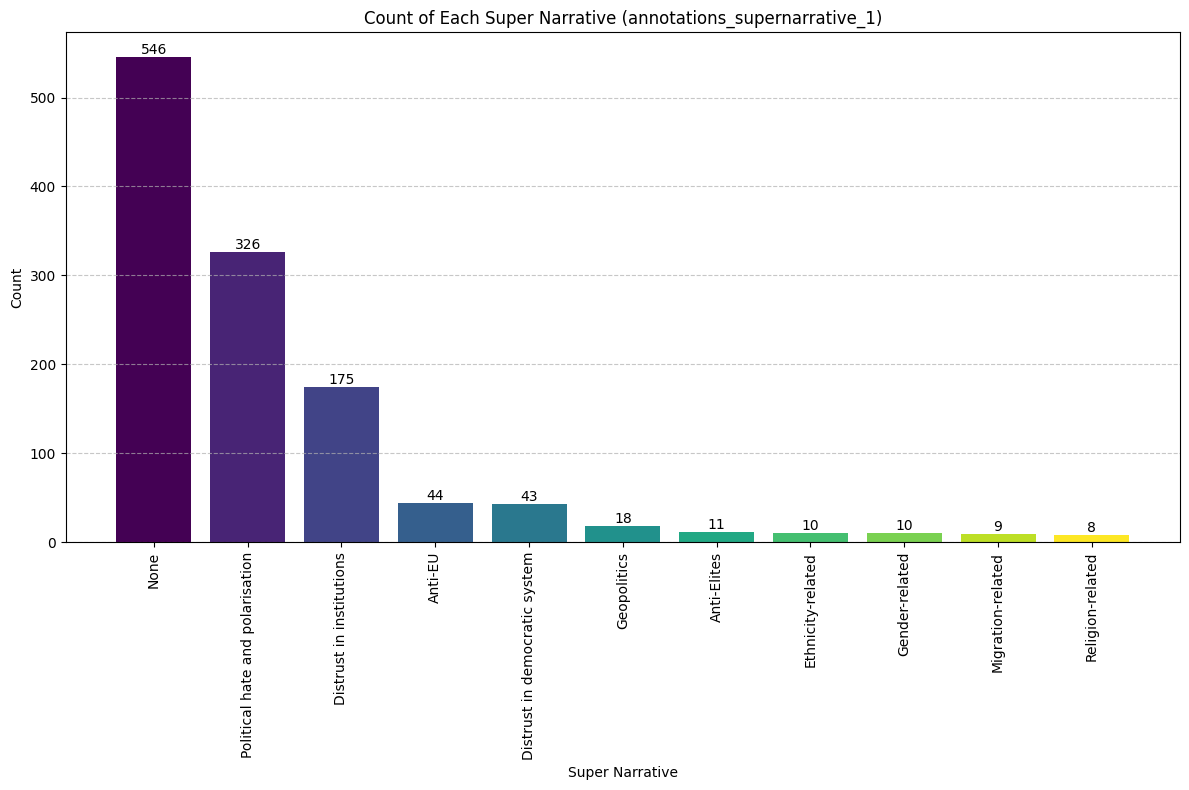

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
#data = pd.read_csv('C:/Users/r1025/Desktop/Group/annotated_tweets_cleaned.csv')  # Make sure to update the file path

# Count the occurrences of each super narrative
supernarrative_counts = df['label'].value_counts()

# Generating a color palette
colors = plt.cm.viridis(np.linspace(0, 1, len(supernarrative_counts)))

# Plotting the bar graph
plt.figure(figsize=(12, 8))
bars = plt.bar(supernarrative_counts.index, supernarrative_counts.values, color=colors)

# Adding the count above each bar
for bar, color in zip(bars, colors):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', color='black')

plt.title('Count of Each Super Narrative (annotations_supernarrative_1)')
plt.xlabel('Super Narrative')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate labels to avoid collision
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('imgs/supernarrative_counts.png')
